<a href="https://colab.research.google.com/github/karimacuna2008/karimacuna2008/blob/main/CasoPractico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Translator Case**

##  Context
As part of the selection process, you have been provided with a sample dataset called sampleData.csv, which contains a subset of January orders. The dataset includes information about customers, products, territories, and the number of product cases ordered. Your task is to analyze the data, gain insights, and transform the information to answer four specific questions. Create a PowerPoint presentation to answer the questions and give us the insights you found. You also need to link your python notebook and show that it works.

## Data description

*   **Customer:** Unique customer ID in Arca Continental, commonly a store.
*   **ProductID:** ProductID for a certain product example: Coca Cola 600 ML 24 Pack
*   **ProductAgrupationID:** The aggrupation of several ProductID’s, this happens mostly in the cases were there are several Pack sizes. Example: Coca Cola 600 ML 24 Pack and Coca Cola 600 ML 12 Pack have different productID but it’s the same productAgrupationID
*   **Territory:** Region in which the sale was done Ex: 245 is Monterrey
*   **Product_cases_ordered:** cases ordered of the product


## Questions


1.   Identify the top five customers who placed the most orders in January.
2.   Determine the most popular productAgrupationID based on the total number of cases ordered.
3.   Identify the most ordered product ID of each productAgrupationID
4.   How does the sales volume vary across different territories?
5.   Are there any notable patterns or trends in the productAgrupationID with high sales volume?




# Pre-work

## Importing the required libraries

In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Loading the data

In [52]:
data = pd.read_csv("/content/drive/MyDrive/Caso Practico/sampleData.csv")


## Understanding the data
Review of the different aspects of the dataset.


**Overview of the data**

> First 10 rows of the data



In [53]:
data.head(10)

,order_date,customer,productAgrupationID,productID,territory,product_cases_ordered
0,2020-01-23T00:00:00.000Z,247474,1431.0,10159,262,28.76
1,2020-01-24T00:00:00.000Z,239611,1626.0,9968,263,28.76
2,2020-01-31T00:00:00.000Z,382014,1202.0,9864,279,28.76
3,2020-01-31T00:00:00.000Z,382014,1202.0,9863,279,28.76
4,2020-01-21T00:00:00.000Z,225565,1202.0,9864,263,28.76
5,2020-01-31T00:00:00.000Z,382014,1202.0,9865,279,28.76
6,2020-01-31T00:00:00.000Z,382014,1202.0,9928,279,28.76
7,2020-01-31T00:00:00.000Z,377848,1418.0,10435,279,28.76
8,2020-01-31T00:00:00.000Z,235365,1194.0,10343,263,28.76
9,2020-01-31T00:00:00.000Z,235365,1194.0,10344,263,28.76


> Last 10 rows

In [54]:
data.tail(10)

,order_date,customer,productAgrupationID,productID,territory,product_cases_ordered
70383,2020-01-23T00:00:00.000Z,231089,1499.0,3367,263,28.76
70384,2020-01-20T00:00:00.000Z,234220,1121.0,877,263,28.76
70385,2020-01-22T00:00:00.000Z,10250750,1121.0,877,263,28.76
70386,2020-01-24T00:00:00.000Z,239611,1121.0,877,263,28.76
70387,2020-01-21T00:00:00.000Z,50733,1499.0,3367,245,28.76
70388,2020-01-07T00:00:00.000Z,240204,1121.0,877,263,28.76
70389,2020-01-06T00:00:00.000Z,239611,1121.0,877,263,28.76
70390,2020-01-07T00:00:00.000Z,241174,1121.0,877,263,28.76
70391,2020-01-08T00:00:00.000Z,221231,1121.0,877,263,28.76
70392,2020-01-06T00:00:00.000Z,221231,1121.0,877,263,28.76


**Information about the dataset**
> Shape of the data set

In [55]:
data.shape

(70393, 6)



> Columns information



In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70393 entries, 0 to 70392
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_date             70393 non-null  object 
 1   customer               70393 non-null  int64  
 2   productAgrupationID    70393 non-null  float64
 3   productID              70393 non-null  int64  
 4   territory              70393 non-null  int64  
 5   product_cases_ordered  70393 non-null  float64
dtypes: float64(2), int64(3), object(1)
memory usage: 3.2+ MB




> Missing data



In [57]:
data.isnull().sum()

order_date               0
customer                 0
productAgrupationID      0
productID                0
territory                0
product_cases_ordered    0
dtype: int64



> Unique values



In [58]:
data.nunique()

order_date                26
customer                 100
productAgrupationID      223
productID                592
territory                 20
product_cases_ordered    157
dtype: int64

## Preparing the data



> Transform the columns **productAgrupationID** and **product_cases_ordered** in the correct data type.



In [59]:
data['productAgrupationID'] = data['productAgrupationID'].astype(int)
data['product_cases_ordered'] = data['product_cases_ordered'].astype(int)
data['order_date'] = pd.to_datetime(data['order_date'])



> Set all the negative numbers in **product_Cases_ordered** into positives.



In [60]:
data['productAgrupationID'] = data['productAgrupationID'].abs()
data['product_cases_ordered'] = data['product_cases_ordered'].abs()

## **Pre-work notes**

1.   There are 100 different customers.
2.   There are 592 different products agrupated in 223 different groups.
3.   There are 20 different territories where the sales are done.
4.   There are 70,393 orders.

Changes made:
1.   Data types from **productAgrupationID** and **product_cases_ordered** transformed into int. We are assuming the customers can't buy a portion of a product and that the productAgrupationID doesn't need a decimal point.
2.   Used abs function to make sure there is no negatives in **productAgrupationID** and **product_cases_ordered** as long as it is imposible to have, for example, -5 products ordered.



In [61]:
data.head(15)

,order_date,customer,productAgrupationID,productID,territory,product_cases_ordered
0,2020-01-23 00:00:00+00:00,247474,1431,10159,262,28
1,2020-01-24 00:00:00+00:00,239611,1626,9968,263,28
2,2020-01-31 00:00:00+00:00,382014,1202,9864,279,28
3,2020-01-31 00:00:00+00:00,382014,1202,9863,279,28
4,2020-01-21 00:00:00+00:00,225565,1202,9864,263,28
5,2020-01-31 00:00:00+00:00,382014,1202,9865,279,28
6,2020-01-31 00:00:00+00:00,382014,1202,9928,279,28
7,2020-01-31 00:00:00+00:00,377848,1418,10435,279,28
8,2020-01-31 00:00:00+00:00,235365,1194,10343,263,28
9,2020-01-31 00:00:00+00:00,235365,1194,10344,263,28


In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70393 entries, 0 to 70392
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   order_date             70393 non-null  datetime64[ns, UTC]
 1   customer               70393 non-null  int64              
 2   productAgrupationID    70393 non-null  int64              
 3   productID              70393 non-null  int64              
 4   territory              70393 non-null  int64              
 5   product_cases_ordered  70393 non-null  int64              
dtypes: datetime64[ns, UTC](1), int64(5)
memory usage: 3.2 MB


# EDA

## **Q1.** Top 5 customers who placed most orders

In [63]:
orders_per_customer = data['customer'].value_counts()

orders_per_customer.head(5)

247474    1274
488882    1210
215932    1036
235365     988
214634     978
Name: customer, dtype: int64

In [64]:
top_5_customers = data['customer'].value_counts().head(5).index

most_ordered_product_by_top_customers = {}

# Find the Most Ordered ProductID and its order count for each Top Customer
for customer in top_5_customers:
    # Filter orders for the current customer
    customer_orders = data[data['customer'] == customer]

    # Determine the most ordered productID for the current customer
    product_counts = customer_orders['productID'].value_counts()
    most_ordered_product = product_counts.idxmax()
    order_count = product_counts.max()

    # Store the result in the dictionary
    most_ordered_product_by_top_customers[customer] = (most_ordered_product, order_count)

# Dictionary to a DataFrame
most_ordered_products_df = pd.DataFrame(list(most_ordered_product_by_top_customers.items()), columns=['Customer', 'ProductID and Order Count'])
most_ordered_products_df[['Most Ordered ProductID', 'Order Count']] = pd.DataFrame(most_ordered_products_df['ProductID and Order Count'].tolist(), index=most_ordered_products_df.index)
most_ordered_products_df.drop(columns=['ProductID and Order Count'], inplace=True)

most_ordered_products_df

,Customer,Most Ordered ProductID,Order Count
0,247474,1157,31
1,488882,877,60
2,215932,877,38
3,235365,1260,37
4,214634,778,19


## **Q2.**  Most popular productAgrupationID based on the total number of cases ordered

In [83]:
total_cases_per_productAgrupation = data.groupby('productAgrupationID')['product_cases_ordered'].sum().sort_values(ascending=False)

total_cases_per_productAgrupation.head(1)

productAgrupationID
1121    83892
Name: product_cases_ordered, dtype: int64

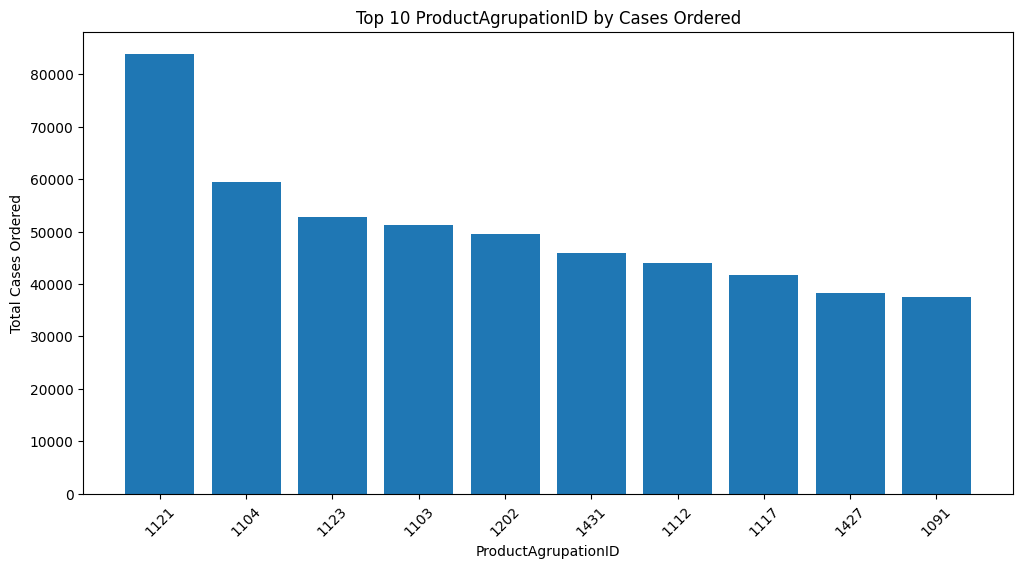

In [66]:
# Get the top 10 products by total cases ordered
top_10_productAgrupations = total_cases_per_productAgrupation.head(10)

# Prepare the data for the chart
product_names = top_10_productAgrupations.index.astype(str)
product_cases = top_10_productAgrupations.values

# Create the bar chart
plt.figure(figsize=(12, 6))
plt.bar(product_names, product_cases)
plt.xlabel("ProductAgrupationID")
plt.ylabel("Total Cases Ordered")
plt.title("Top 10 ProductAgrupationID by Cases Ordered")
plt.xticks(rotation=45)
plt.show()


## **Q3.**  Most ordered productID of each productAgrupationID

In [67]:
# Group the different products by productAgrupationID and sum the total of product_cases_ordered per productID.
total_cases = data.groupby(['productAgrupationID', 'productID'])['product_cases_ordered'].sum().reset_index()

# Sort the productAgrupationID in ascending order and the productID in descending order using the product_cases_ordered value.
total_cases_sorted = total_cases.sort_values(by=['productAgrupationID', 'product_cases_ordered'], ascending=[True, False])

# Drop all the products for every productArupationID but the one in the top (most ordered product)
most_sold_product_per_productAgrupationID = total_cases_sorted.drop_duplicates(subset=['productAgrupationID'], keep='first')

most_sold_product_per_productAgrupationID

,productAgrupationID,productID,product_cases_ordered
0,1021,3996,3217
4,1023,4205,1806
8,1025,4163,112
9,1027,4341,1431
13,1037,1297,16039
...,...,...,...
580,1626,9968,7130
582,1628,9969,2840
584,1629,10139,8979
587,1631,9972,776


## **Q4.** Sales volume across different territories?

In [68]:
sales_volume_per_territory = data.groupby('territory')['product_cases_ordered'].sum().reset_index().sort_values(by='product_cases_ordered', ascending=False)

sales_volume_per_territory

,territory,product_cases_ordered
8,263,648105
6,252,342051
0,245,165522
13,279,133240
7,262,111613
1,246,104409
4,250,83292
19,316,79508
18,301,57399
16,289,44458


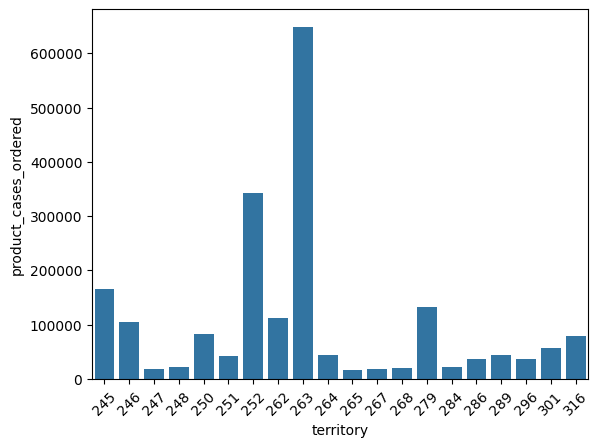

In [69]:
plot_sales_per_territory = sns.barplot(data=sales_volume_per_territory, x='territory', y='product_cases_ordered')
plot_sales_per_territory.tick_params(axis='x', rotation=45)


## **Q5.** Patterns or trends in the productAgrupationID with high sales volume

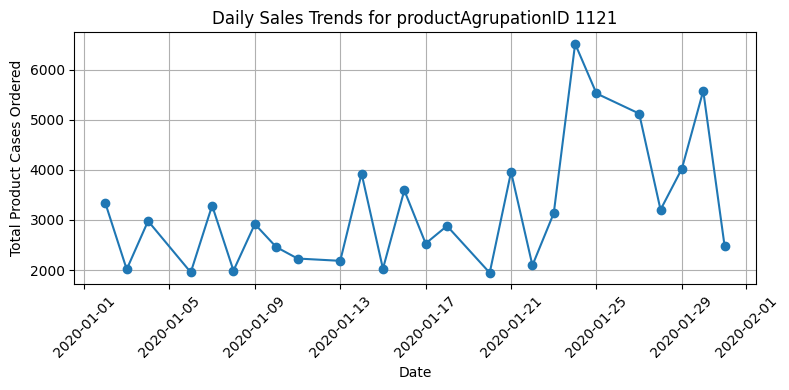

In [70]:
# Find the productAgrupationID with the highest sales volume
highest_sales_agrupation_id = data.groupby('productAgrupationID')['product_cases_ordered'].sum().idxmax()

# Extract data for the productAgrupationID with the highest sales volume
highest_sales_data = data[data['productAgrupationID'] == highest_sales_agrupation_id]

# Group by day to see daily trends
daily_sales_trends = highest_sales_data.groupby(highest_sales_data['order_date'].dt.date)['product_cases_ordered'].sum().reset_index()

# Convert 'order_date' back to datetime to ensure proper plotting
daily_sales_trends['order_date'] = pd.to_datetime(daily_sales_trends['order_date'])

# Plot the daily sales trends
plt.figure(figsize=(8, 4))
plt.plot(daily_sales_trends['order_date'], daily_sales_trends['product_cases_ordered'], marker='o', linestyle='-')
plt.title(f'Daily Sales Trends for productAgrupationID {highest_sales_agrupation_id}')
plt.xlabel('Date')
plt.ylabel('Total Product Cases Ordered')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

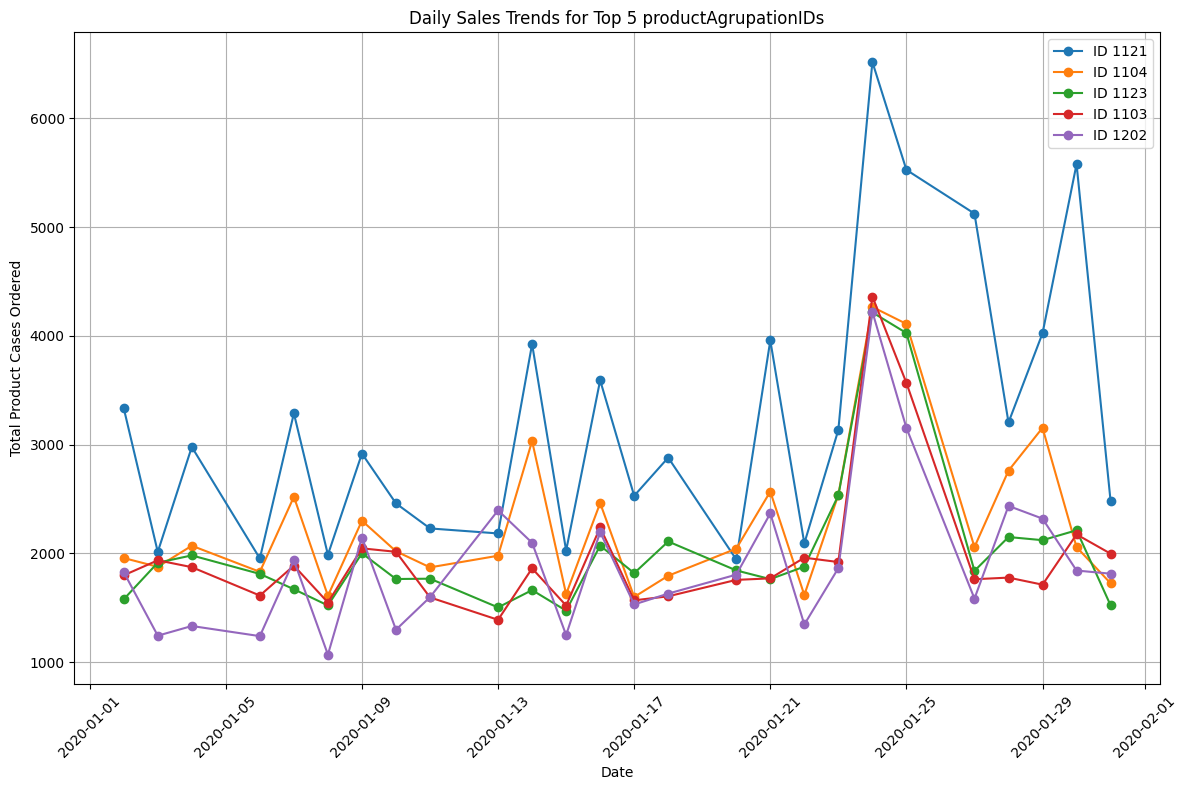

In [71]:
top_5_agrupation_ids = data.groupby('productAgrupationID')['product_cases_ordered'].sum().nlargest(5).index

# Initialize a figure for plotting
plt.figure(figsize=(12, 8))

# 2. Extract and Analyze Sales Data for Each of the Top 5
for agrupation_id in top_5_agrupation_ids:
    # Filter data for the current productAgrupationID
    specific_data = data[data['productAgrupationID'] == agrupation_id]

    # Aggregate sales data by day
    daily_sales = specific_data.groupby(specific_data['order_date'].dt.date)['product_cases_ordered'].sum()

    # 3. Plot the trends
    plt.plot(daily_sales.index, daily_sales.values, marker='o', linestyle='-', label=f'ID {agrupation_id}')

# Customize the plot
plt.title('Daily Sales Trends for Top 5 productAgrupationIDs')
plt.xlabel('Date')
plt.ylabel('Total Product Cases Ordered')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()

# **Extra**

## **Sales by day of the week**

In [72]:
data['day_of_week'] = data['order_date'].dt.dayofweek

# Optionally, map the day of week to actual names for clearer interpretation
day_names = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
data['day_of_week_name'] = data['day_of_week'].map(day_names)

# Group data by the day of the week and sum product_cases_ordered for each day
sales_by_day_of_week = data.groupby('day_of_week_name')['product_cases_ordered'].sum()

# Sort the results by day of the week to maintain logical order (optional if using day_of_week_name)
sales_by_day_of_week = sales_by_day_of_week.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# The result is a series with total sales for each day of the week
print(sales_by_day_of_week)

day_of_week_name
Monday       260869.0
Tuesday      318880.0
Wednesday    261759.0
Thursday     429728.0
Friday       432348.0
Saturday     346652.0
Sunday            NaN
Name: product_cases_ordered, dtype: float64


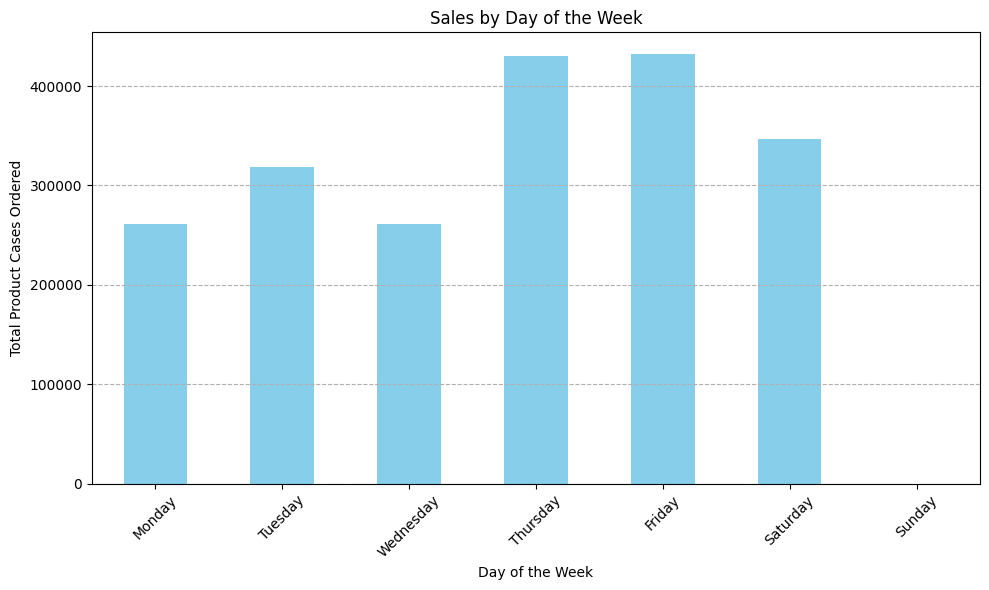

In [73]:
sales_by_day_of_week.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Product Cases Ordered')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

## Total of product cases ordered by day

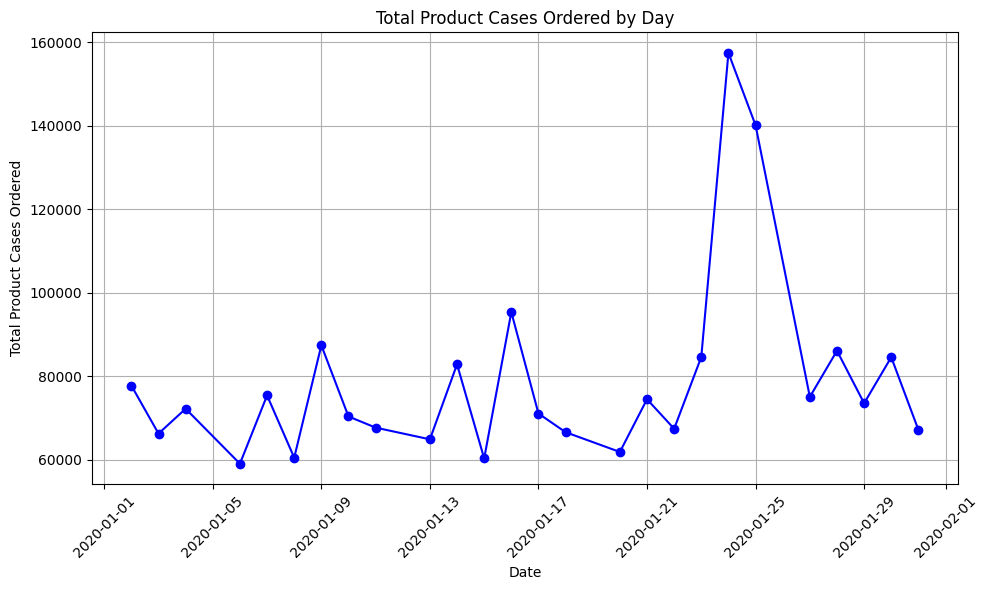

In [81]:
daily_sales = data.groupby(data['order_date'].dt.date)['product_cases_ordered'].sum()
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.plot(daily_sales.index, daily_sales, marker='o', linestyle='-', color='blue')  # Customize the plot color, marker, etc., as desired
plt.title('Total Product Cases Ordered by Day')
plt.xlabel('Date')
plt.ylabel('Total Product Cases Ordered')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.grid(True)  # Add a grid for easier visualization of values
plt.tight_layout()  # Adjust layout to make sure everything fits without overlap
plt.show()

## Total of orders by day

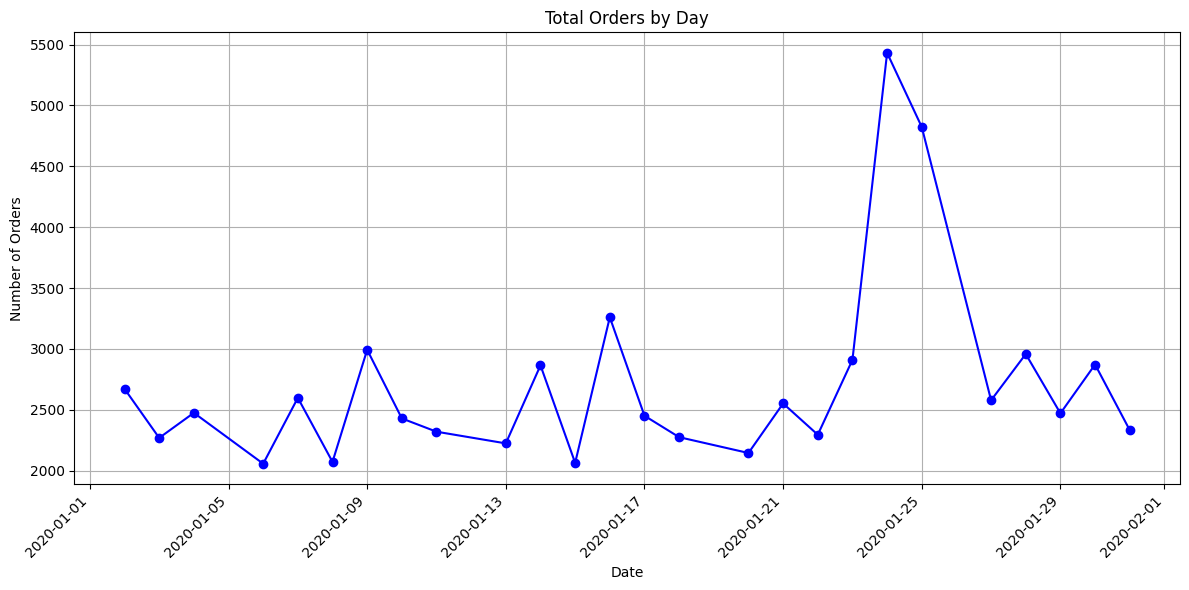

In [75]:
daily_order_counts = data.groupby('order_date').size()
plt.figure(figsize=(12, 6))
daily_order_counts.plot(kind='line', color='blue', marker='o', linestyle='-')
plt.title('Total Orders by Day')
plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

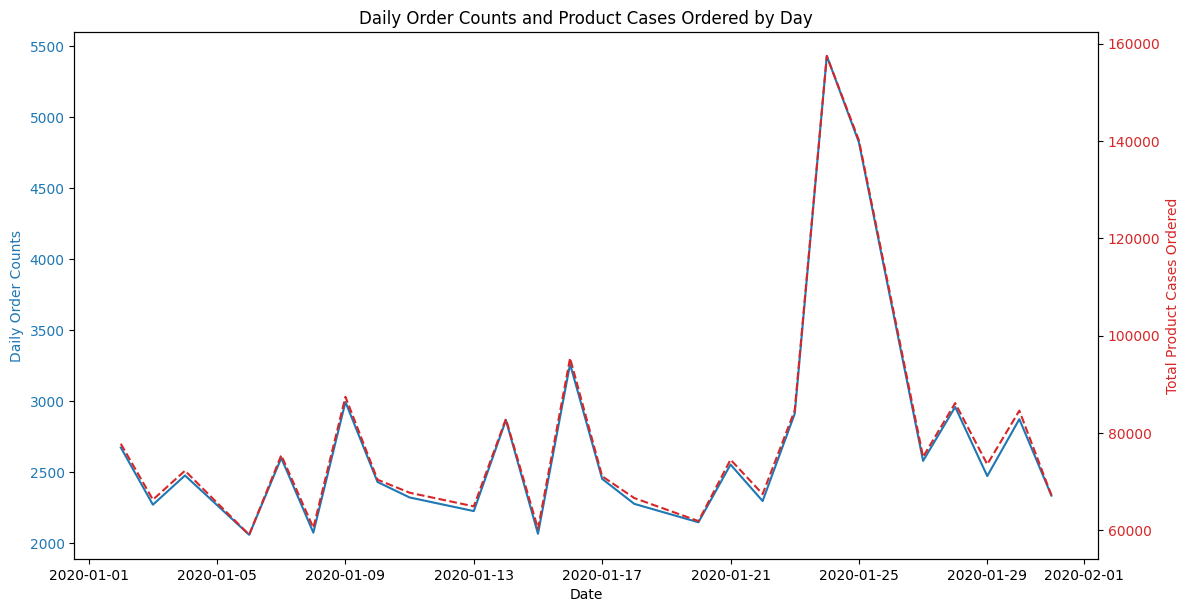

In [82]:
# Aggregate daily order counts
daily_order_counts = data.groupby(data['order_date'].dt.date).size()

# Aggregate daily totals of product_cases_ordered
daily_sales = data.groupby(data['order_date'].dt.date)['product_cases_ordered'].sum()

fig, ax1 = plt.subplots(figsize=(12, 6))

# First axis for Daily order counts
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Daily Order Counts', color=color)
ax1.plot(daily_order_counts.index, daily_order_counts, color=color, label='Daily Order Counts')
ax1.tick_params(axis='y', labelcolor=color)

# Second axis for Total Product Cases Ordered by day
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Total Product Cases Ordered', color=color)
ax2.plot(daily_sales.index, daily_sales, color=color, label='Total Product Cases Ordered', linestyle='--')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Daily Order Counts and Product Cases Ordered by Day')
plt.show()

## Top 5 and Bottom 5 products ordered

In [77]:
# Calculate the total product_cases_ordered per productID
total_cases_per_product = data.groupby('productID')['product_cases_ordered'].sum().sort_values(ascending=False)

# Display the first 5 products (highest totals)
print("Top 5 Products by Total Cases Ordered:")
print(total_cases_per_product.head(5))

# Display the last 5 products (lowest totals)
print("\nBottom 5 Products by Total Cases Ordered:")
print(total_cases_per_product.tail(5))

Top 5 Products by Total Cases Ordered:
productID
877     83892
1260    59463
1149    51273
2800    37444
778     31348
Name: product_cases_ordered, dtype: int64

Bottom 5 Products by Total Cases Ordered:
productID
14878    27
6458     27
14877    27
14876    27
6615     26
Name: product_cases_ordered, dtype: int64


## ProductID with the highest cases ordered per territory

In [78]:
# Group by territory and productID, then sum up product_cases_ordered
territory_product_sales = data.groupby(['territory', 'productID'])['product_cases_ordered'].sum().reset_index()

# Sort and find the highest sales per territory
territory_product_sales_sorted = territory_product_sales.sort_values(['territory', 'product_cases_ordered'], ascending=[True, False])
highest_sales_per_territory = territory_product_sales_sorted.drop_duplicates(subset=['territory'], keep='first')

print(highest_sales_per_territory)

      territory  productID  product_cases_ordered
10          245        877                   7463
238         246        977                   7734
463         247       1260                   1199
575         248       3067                   1485
676         250       1179                   2967
899         251        877                   4654
1001        252        877                  24382
1264        262       1149                   2386
1506        263       1178                  19297
1741        264        877                   2690
1908        265       1149                   1018
2040        267       1149                    528
2160        268        877                   1937
2263        279       1179                   3987
2493        284       1179                   1855
2581        286       1179                    933
2738        289        877                   3212
2943        296       1260                    900
3090        301       1179                   1208


## Customers per territory

In [79]:
customers_per_territory = data.groupby('territory')['customer'].nunique().reset_index(name='unique_customers')

# Sort the results by the number of unique customers in descending order
customers_per_territory_sorted = customers_per_territory.sort_values(by='unique_customers', ascending=False)

# Display the territories with the highest number of distinct customers
print(customers_per_territory_sorted)

    territory  unique_customers
8         263                32
6         252                16
0         245                 8
13        279                 7
1         246                 5
7         262                 5
19        316                 4
4         250                 4
18        301                 3
5         251                 2
9         264                 2
15        286                 2
16        289                 2
17        296                 2
3         248                 1
11        267                 1
12        268                 1
2         247                 1
14        284                 1
10        265                 1


## Orders per territory

In [80]:
orders_per_territory = data.groupby('territory').size().reset_index(name='total_orders')

# Calculate the overall total of orders
total_orders = orders_per_territory['total_orders'].sum()

# Calculate the percentage of total orders for each territory
orders_per_territory['percentage_of_total'] = (orders_per_territory['total_orders'] / total_orders) * 100

# Sort the results by total_orders in descending order (optional)
orders_per_territory = orders_per_territory.sort_values(by='total_orders', ascending=False)

print(orders_per_territory)

    territory  total_orders  percentage_of_total
8         263         22826            32.426520
6         252         11536            16.387993
0         245          5522             7.844530
13        279          4620             6.563153
7         262          3908             5.551688
1         246          3389             4.814399
4         250          2807             3.987612
19        316          2694             3.827085
18        301          2028             2.880968
16        289          1550             2.201923
5         251          1418             2.014405
9         264          1402             1.991675
15        286          1321             1.876607
17        296          1312             1.863822
3         248           763             1.083915
12        268           702             0.997258
14        284           689             0.978791
11        267           656             0.931911
2         247           632             0.897817
10        265       

## **Insights**


*   Thursday and Friday were the preferred days by the customers to place an
order.
*   Customers didn't place orders on Sunday.
*   The territory with the highest amount of customers is 263 with 32 different customers.
*   There was a sudden high peak of sales on January 24th.
*   At the end of the month the sales normalize again.
*   The favorite products are product with ID 877, 1260 and 1149.
*   ProductIDs 6615, 14876 and 14877 have the lowest amount of sales.
*   The territories with the highest amount of sales are terrtories 263, 252 and 245.







